# Функции для обучения, тестирования модели и отображения датасета  

In [1]:
import math
import matplotlib.pyplot as plt

def print_dataset(dataset, X=None, y=None, y_pred=None, print_info=False, title=None):
    if X is None:
        X = dataset.data.values
    if y is None:
        y = dataset.target.to_numpy()
    if title is None and y_pred is None:
        title = "Dataset " + dataset.details['name']

    # ================================

    if print_info is True:
        print(dataset.DESCR)

    # ================================

    k_size_graphic = 4
    dot_size = 5 * k_size_graphic
    ncols = 5

    # --------------------------------
    n_features = X.shape[1]
    n_axs = n_features + 1 + 1
    nrows = math.ceil(n_axs / ncols)
    # --------------------------------

    width, height = ncols*k_size_graphic, nrows*k_size_graphic
    # width, height = 16, 10
    # ================================

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height))

    if title != "":
        fig.suptitle(title)

    for feature_index, ax in enumerate(axs.flatten()):
        if feature_index < n_features:
            ax.scatter(X[:, feature_index], y, color='red', s=dot_size)
            if y_pred is not None:
                ax.scatter(X[:, feature_index], y_pred, color='blue', s=dot_size)
            ax.set_xlabel(dataset.feature_names[feature_index])
            ax.set_ylabel(dataset.target.name)
        else:
            fig.delaxes(ax)
    
    if nrows == 1:
        last_ax = axs[-1]
    else:
        last_ax = axs[-1, -1]
        
    if last_ax not in fig.axes:
        fig.add_axes(last_ax)
    last_ax.hist(y)
    last_ax.set_xlabel(dataset.target.name)
    last_ax.set_ylabel('Frequency')

    plt.scatter([], [], color='red', label='Real data', s=dot_size)
    if y_pred is not None:
        plt.scatter([], [], color='blue', label='Predictions', s=dot_size)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def train_test_print_model(model, dataset, X=None, y=None, print_info=False, print_result=False, view_graphics=False, title=None):
    if X is None:
        X = dataset.data.values
    if y is None:
        y = dataset.target.to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    if view_graphics:
        print_dataset(dataset, X_test, y_test, y_pred, print_info=print_info, title=title)
    if print_result:
        print('MSE:', mse)
        print('R^2:', r2)

    return mse, r2

# Обьяснение метрик 

`mean_squared_error` (MSE) и `r2_score` - это две метрики, которые широко используются для оценки качества модели линейной регрессии.

`mean_squared_error` - это среднеквадратичная ошибка между фактическими и прогнозируемыми значениями целевой переменной. Эта метрика измеряет среднюю величину квадратичной ошибки, то есть разницу между фактическими значениями и прогнозами, возведенную в квадрат. Чем меньше MSE, тем лучше качество модели.

`r2_score` - это коэффициент детерминации, который показывает, насколько хорошо модель объясняет изменчивость целевой переменной. R-квадрат принимает значения от 0 до 1, где 0 означает, что модель не объясняет никакой изменчивости, а 1 означает, что модель объясняет всю изменчивость. Чем выше R-квадрат, тем лучше качество модели.

Чтобы вычислить эти метрики для нашей модели линейной регрессии, мы можем использовать функции `mean_squared_error` и `r2_score` из библиотеки sklearn.metrics. Эти функции принимают на вход фактические значения целевой переменной `y_test` и прогнозы модели `y_pred` и возвращают значение метрики.

Пример использования:
```
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R^2:', r2)
```

Здесь `y_test` - это фактические значения целевой переменной для тестовой выборки, а `y_pred` - прогнозы модели для тестовой выборки, которые мы получили ранее. Результатом выполнения этого кода будут значения MSE и R-квадрат для нашей модели.

# Пример использования (на примере эталонной модели)

c:\Users\My\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\datasets\_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(


**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

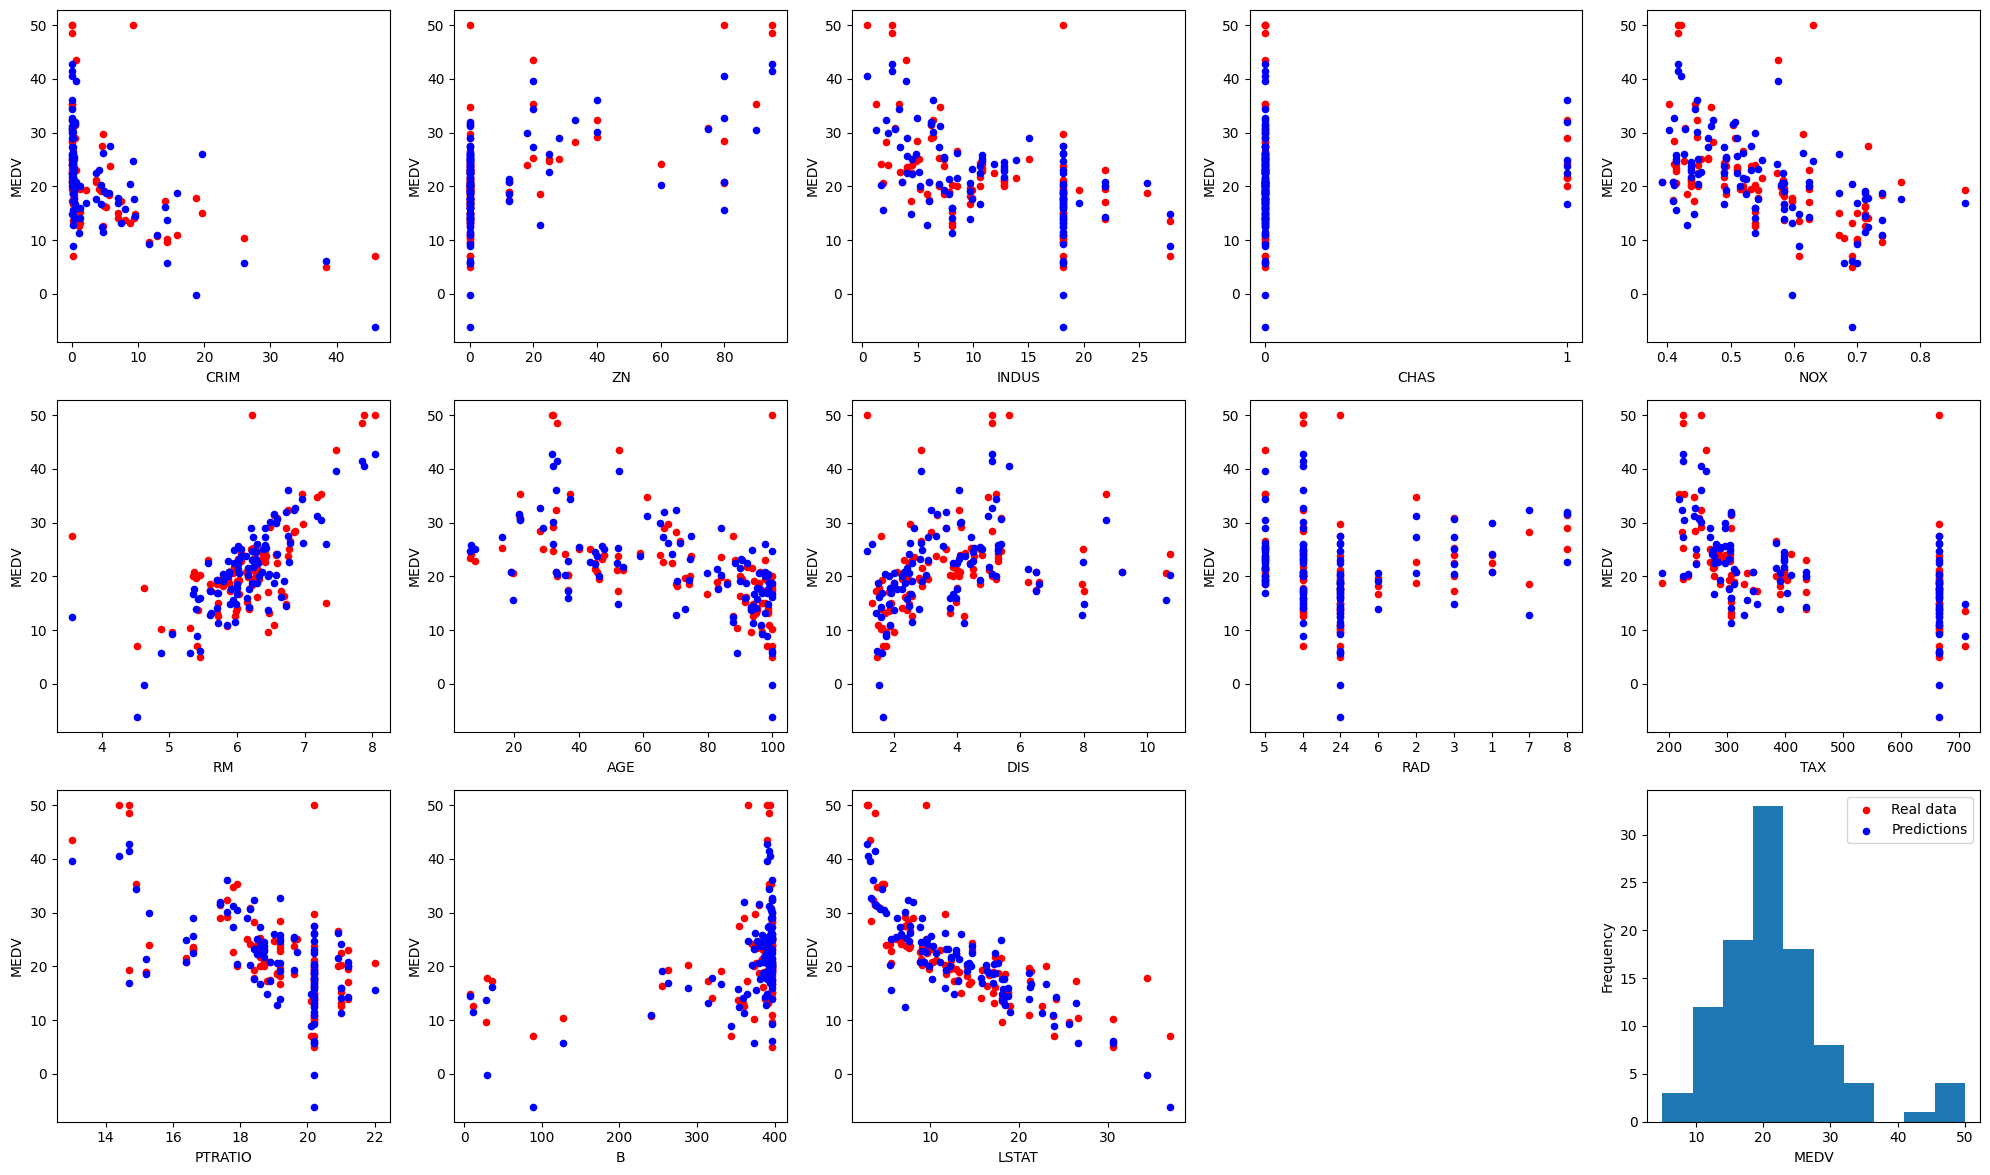

MSE: 24.29111947497353
R^2: 0.6687594935356318


(24.29111947497353, 0.6687594935356318)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version='active', as_frame=True , parser='liac-arff')
model = LinearRegression()

train_test_print_model(model, boston, print_result=True, print_info=True, view_graphics=True)

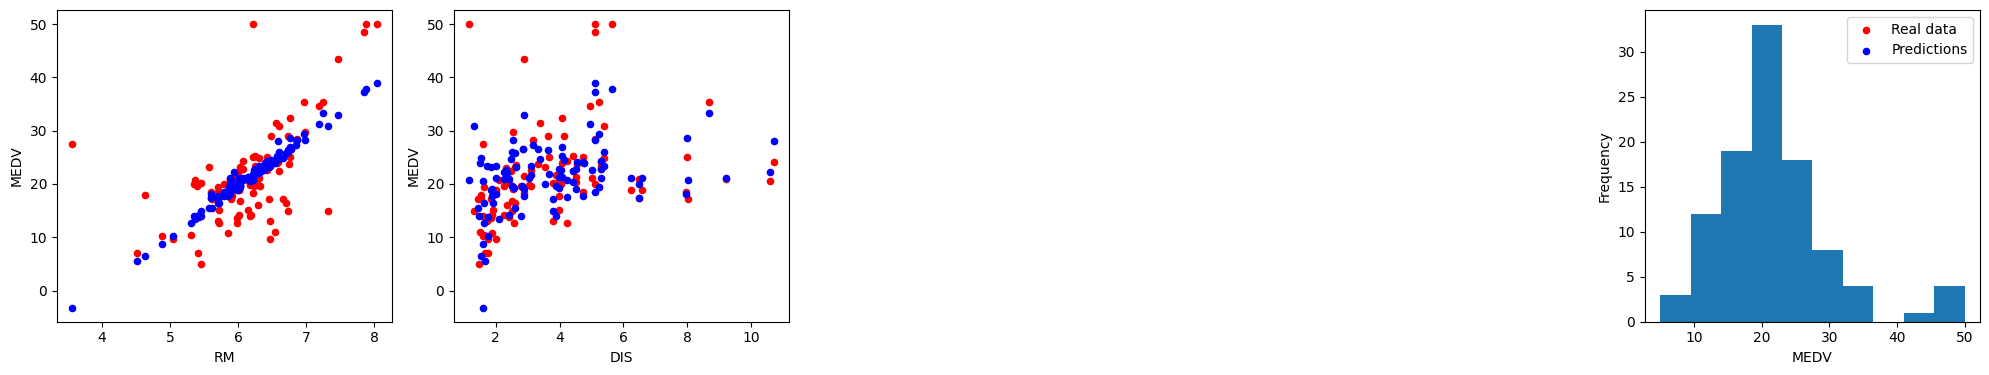

MSE: 44.38116386952767
R^2: 0.3948060231325966


(44.38116386952767, 0.3948060231325966)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True , parser='liac-arff')
model = LinearRegression()

boston.feature_names = ['RM', 'DIS']
train_test_print_model(model, boston, X=boston.data[['RM', 'DIS']].values, print_result=True, view_graphics=True)

# Превью класса модели для соответствия классу LinearRegression из sklearn.linear_model

In [5]:
from sklearn.linear_model import LinearRegression

class get_model_LinearRegression:
    def __init__(self):
        coef_ = []
        intercept_ = None

    def fit(self, X_train, y_train):    # TODO: implement 
        __model = LinearRegression()
        __model.fit(X_train, y_train)
        self.coef_ = __model.coef_
        self.intercept_ = __model.intercept_
    
    def predict(self, X_test):
        y_pred = []

        for i in range(len(X_test)):
            y = self.intercept_ + sum([self.coef_[j] * float(X_test[i][j]) for j in range(len(self.coef_))])
            y_pred.append(y)
        return y_pred

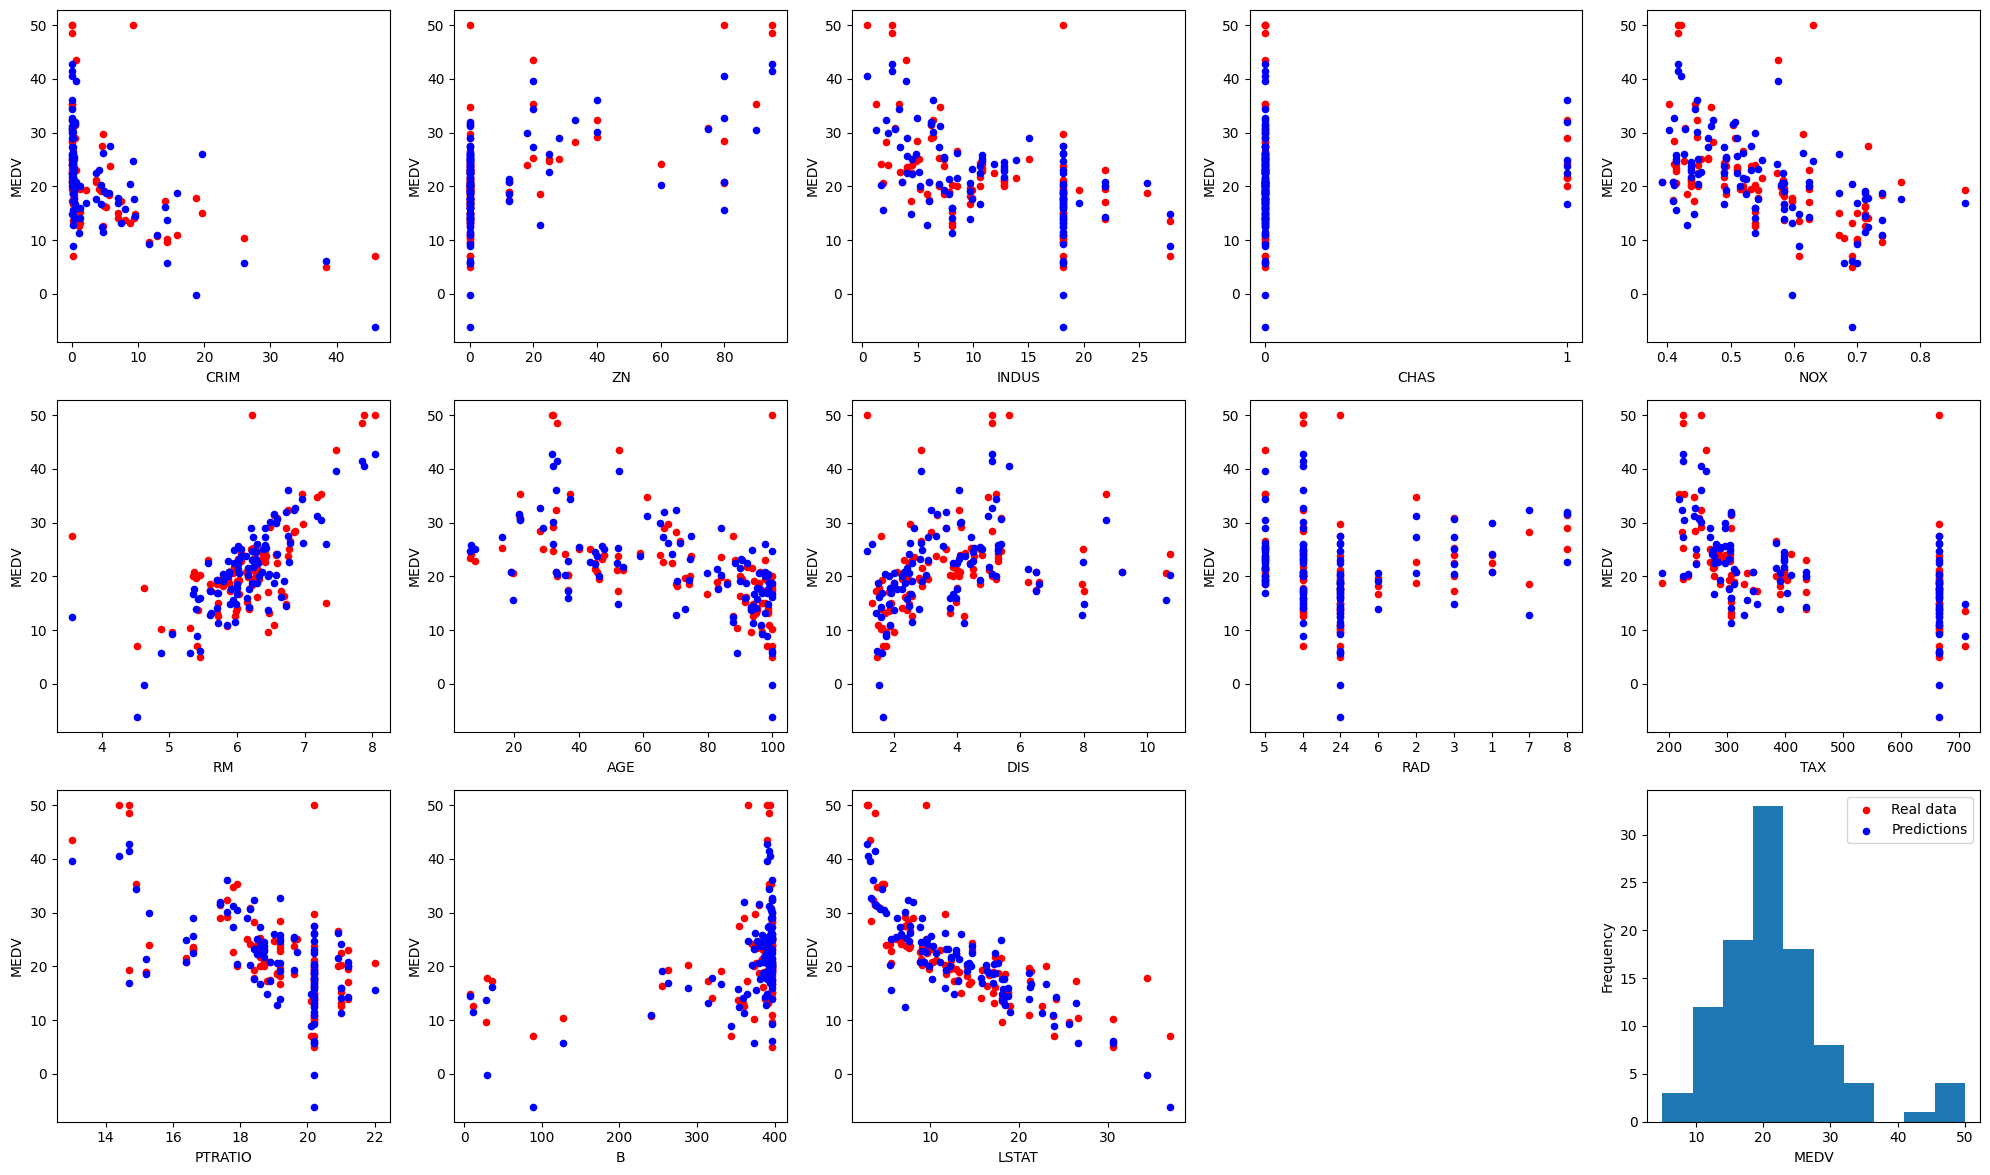

MSE: 24.291119474973534
R^2: 0.6687594935356318


(24.291119474973534, 0.6687594935356318)

In [6]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True , parser='liac-arff')
model = get_model_LinearRegression()

train_test_print_model(model, boston, print_result=True, view_graphics=True)